## simulated block model network

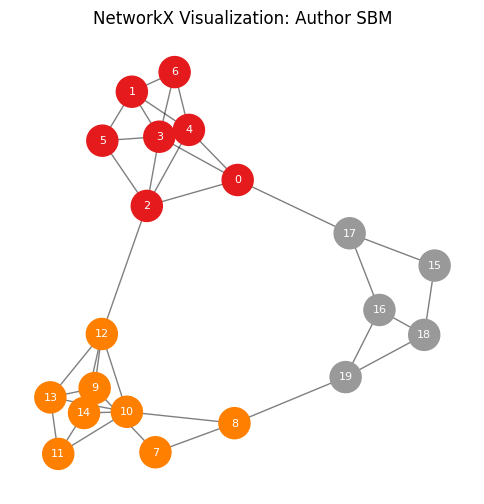

Average degree: 3.7
Average clustering coefficient: 0.4083333333333333


In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

nodes = 20
sizes = [7, 8, 5]
p = [[0.6, 0.05, 0.02],
     [0.05, 0.5, 0.05],
     [0.02, 0.05, 0.7]]
G = nx.stochastic_block_model(sizes, p, seed=42)

block_topics = {
    0: ["graph", "network", "community", "node", "edge"],
    1: ["text", "word", "sentence", "language", "embedding"],
    2: ["author", "write", "book", "story", "reader"]
}

for node, data in G.nodes(data=True):
    block = data["block"]
    vocab = block_topics[block]
    num_texts = random.randint(1, 5)

    texts = []
    for _ in range(num_texts):
        length = random.randint(5, 15)  # sentence length
        sentence = " ".join(random.choices(vocab, k=length))
        texts.append(sentence)

    data["texts"] = texts

colors = [data["block"] for _, data in G.nodes(data=True)]

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.Set1, node_size=500)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="white")
plt.title("NetworkX Visualization: Author SBM")
plt.axis("off")
plt.show()

avg_degree = np.mean([deg for _, deg in G.degree()])
clustering_coeff = nx.average_clustering(G)

print("Average degree:", avg_degree)
print("Average clustering coefficient:", clustering_coeff)

In [25]:
#print num edges and nodes
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 20
Number of edges: 37


## Open Graph Benchmark Citation Network Data

In [ ]:
from ogb.nodeproppred import PygNodePropPredDataset
import torch
from torch_geometric.utils import to_networkx

# Temporarily override torch.load to always use weights_only=False
torch_load_old = torch.load
def torch_load_new(*args, **kwargs):
    kwargs["weights_only"] = False
    return torch_load_old(*args, **kwargs)
torch.load = torch_load_new

dataset = PygNodePropPredDataset(name="ogbn-arxiv", root="./ogb_data/")
data = dataset[0]
print(data)

split_idx = dataset.get_idx_split()
train_idx = split_idx["train"]
valid_idx = split_idx["valid"]
test_idx  = split_idx["test"]

print(data)
print("Training nodes:", len(train_idx), "Validation:", len(valid_idx), "Test:", len(test_idx))

G_nx = to_networkx(data, to_undirected=True) 
for i in range(data.num_nodes):
    G_nx.nodes[i]["x"] = data.x[i].tolist()
    G_nx.nodes[i]["y"] = int(data.y[i])

print(f"NetworkX graph: {G_nx.number_of_nodes()} nodes, {G_nx.number_of_edges()} edges")
print("Example node 0 attributes:", G_nx.nodes[0])

In [21]:
import gzip
from pathlib import Path
import shutil

# Base directory containing gz files
base_dir = Path(r"C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data")
gz_files = list(base_dir.rglob("*.gz"))

print(f"Found {len(gz_files)} gz files.")

for gz_file in gz_files:
    output_file = gz_file.with_suffix('')  # remove .gz extension
    with gzip.open(gz_file, 'rt', encoding='utf-8') as f_in, open(output_file, 'w', encoding='utf-8') as f_out:
        shutil.copyfileobj(f_in, f_out)
    print(f"Extracted: {gz_file} -> {output_file}")


Found 11 gz files.
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\mapping\labelidx2arxivcategeory.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\mapping\labelidx2arxivcategeory.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\mapping\nodeidx2paperid.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\mapping\nodeidx2paperid.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\raw\edge.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\raw\edge.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\raw\node-feat.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb_data\ogbn_arxiv\raw\node-feat.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\ogb

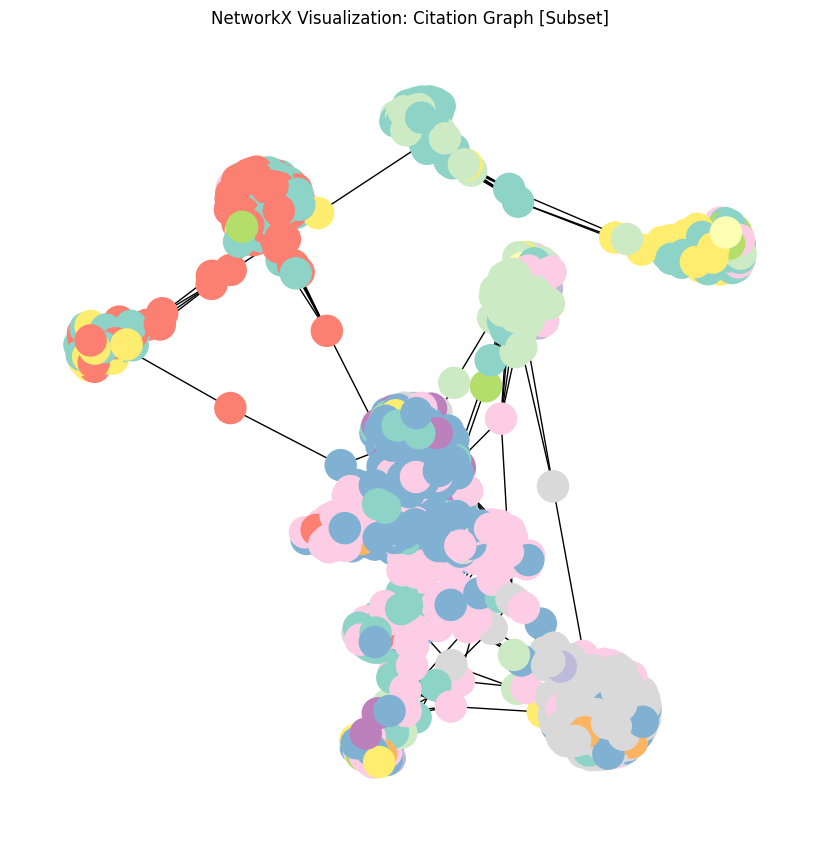

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

# Let's pick 3 labels (topics) to highlight
labels_to_show = [0, 1, 2]  # you can pick the first 3 labels for demonstration

# For each label, pick 5 "central" nodes with highest degree
central_nodes = []
for lbl in labels_to_show:
    nodes_with_label = [n for n, d in G_nx.nodes(data=True) if d["y"] == lbl]
    # sort by degree descending
    nodes_sorted = sorted(nodes_with_label, key=lambda n: G_nx.degree[n], reverse=True)
    central_nodes.extend(nodes_sorted[:5])  # take top 5

# Include their neighbors
sub_nodes = set(central_nodes)
for n in central_nodes:
    sub_nodes.update(G_nx.neighbors(n))

subG = G_nx.subgraph(sub_nodes).copy()

# Assign colors based on community label
node_colors = [subG.nodes[n]["y"] for n in subG.nodes()]

plt.figure(figsize=(8,8))
pos = nx.spring_layout(subG, seed=42)  # layout for clear visualization
nx.draw(subG, pos, node_color=node_colors, cmap=plt.cm.Set3, with_labels=False, node_size=500)
plt.title("NetworkX Visualization: Citation Graph [Subset]")
plt.show()


In [ ]:
#print num edges and nodes
print("Number of nodes:", G_nx.number_of_nodes())
print("Number of edges:", G_nx.number_of_edges())

Number of nodes: 169343
Number of edges: 1157799


In [ ]:
avg_degree = np.mean([deg for _, deg in G_nx.degree()])
clustering_coeff = nx.average_clustering(G_nx)

print("Average degree:", avg_degree)
print("Average clustering coefficient:", clustering_coeff)

Average degree: 13.674010735607613
Average clustering coefficient: 0.22612914062470948


## Open Graph Benchmark Collaboration Network Data

In [ ]:
from ogb.linkproppred import PygLinkPropPredDataset

# Load the dataset
dataset = PygLinkPropPredDataset(name="ogbl-collab")
split_edge = dataset.get_edge_split()
train_edge, valid_edge, test_edge = split_edge["train"], split_edge["valid"], split_edge["test"]

In [30]:
import gzip
from pathlib import Path
import shutil

# Base directory containing gz files
base_dir = Path(r"C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset")
gz_files = list(base_dir.rglob("*.gz"))

print(f"Found {len(gz_files)} gz files.")

for gz_file in gz_files:
    output_file = gz_file.with_suffix('')  # remove .gz extension
    with gzip.open(gz_file, 'rt', encoding='utf-8') as f_in, open(output_file, 'w', encoding='utf-8') as f_out:
        shutil.copyfileobj(f_in, f_out)
    print(f"Extracted: {gz_file} -> {output_file}")


Found 7 gz files.
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\mapping\nodeidx2authorid.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\mapping\nodeidx2authorid.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge_weight.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge_weight.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge_year.csv.gz -> C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\edge_year.csv
Extracted: C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw\node-feat.

In [45]:
data_c = dataset[0]

G_nx_c = nx.Graph()
edge_index = data_c.edge_index.numpy()
for i in range(edge_index.shape[1]):
    G_nx_c.add_edge(edge_index[0, i], edge_index[1, i])

# Add node features
for i in range(data_c.num_nodes):
    G_nx_c.nodes[i]['feat'] = data_c.x[i].numpy()

# Add edge weights
for u, v in G_nx_c.edges():
    G_nx_c[u][v]['weight'] = 1

In [53]:
import gzip
import shutil
from pathlib import Path

# Your local dataset directory
dataset_dir = Path(r"C:\Users\amkah\OneDrive\Documents\GitHub\SocialAnalysis\code\dataset\ogbl_collab\raw")

# Extract all .gz files to the same directory
for gz_file in dataset_dir.rglob("*.gz"):
    out_file = gz_file.with_suffix('')  # remove .gz
    if not out_file.exists():  # avoid overwriting
        with gzip.open(gz_file, 'rb') as f_in, open(out_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)
        print(f"Extracted {gz_file.name} -> {out_file.name}")


In [56]:
import pandas as pd
import networkx as nx

# Load the edge list
edges_file = dataset_dir / "edge.csv"  # adjust if name is different
# edges_df = pd.read_csv(edges_file)
# G_collab = nx.from_pandas_edgelist(edges_df, source='source', target='target')
edges_df = pd.read_csv(edges_file, header=None, names=["source", "target"])
G_collab = nx.from_pandas_edgelist(edges_df, source="source", target="target")

print("Number of nodes:", G_collab.number_of_nodes())  # ~235k
print("Number of edges:", G_collab.number_of_edges())  # ~1.28M


Number of nodes: 235868
Number of edges: 967632


In [57]:
avg_degree = np.mean([deg for _, deg in G_collab.degree()])
clustering_coeff = nx.average_clustering(G_collab)

print("Average degree:", avg_degree)
print("Average clustering coefficient:", clustering_coeff)

Average degree: 8.20486034561704
Average clustering coefficient: 0.7290352781769089


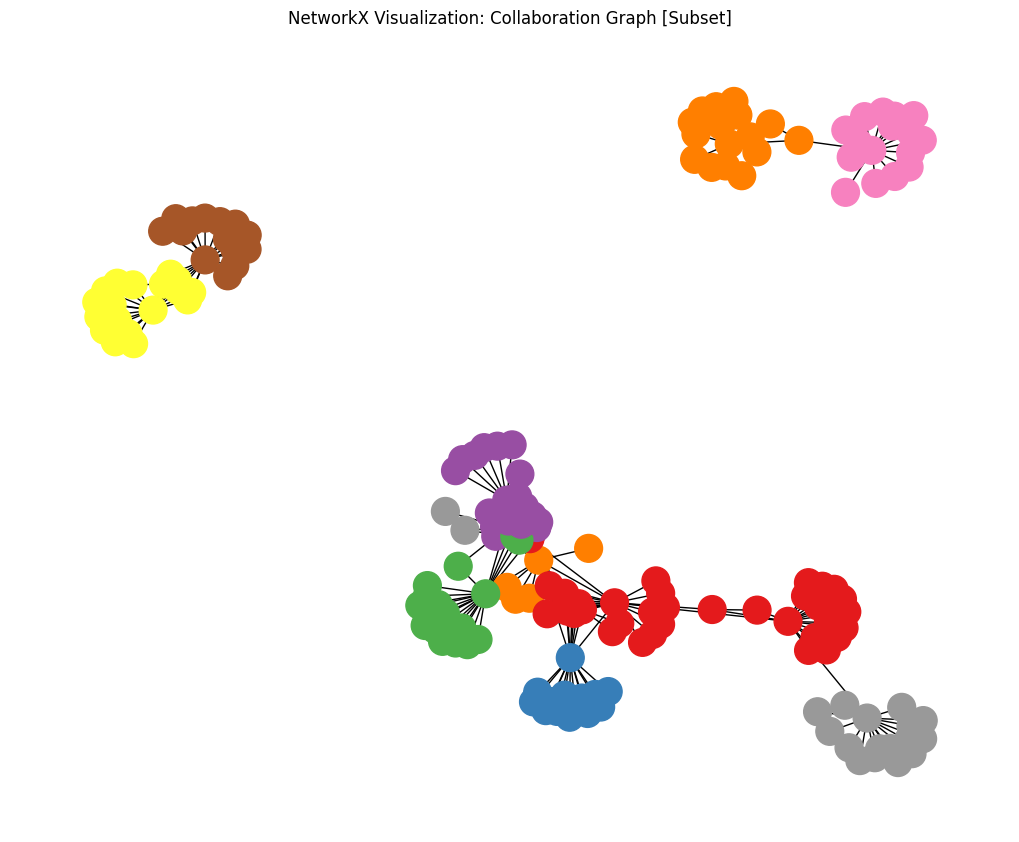

In [70]:
import matplotlib.pyplot as plt
import random

# Define central nodes as top 3 highest-degree nodes
degree_dict = dict(G_collab.degree())
central_nodes = sorted(degree_dict, key=degree_dict.get, reverse=True)[:12]

# Build subgraph: centers + 15 neighbors each
sub_nodes = set(central_nodes)
for center in central_nodes:
    neighbors = list(G_collab.neighbors(center))
    neighbors_sample = random.sample(neighbors, min(15, len(neighbors)))
    sub_nodes.update(neighbors_sample)

H_sub = G_collab.subgraph(sub_nodes).copy()

# Assign colors based on closest central node
node_colors = []
for n in H_sub.nodes():
    if n in central_nodes:
        node_colors.append(central_nodes.index(n))
    else:
        distances = [nx.shortest_path_length(G_collab, source=center, target=n) for center in central_nodes]
        node_colors.append(distances.index(min(distances)))

# Draw subgraph
plt.figure(figsize=(10,8))
pos = nx.spring_layout(H_sub, seed=42)
nx.draw(H_sub, pos, node_color=node_colors, cmap=plt.cm.Set1, with_labels=False, node_size=400)
plt.title("NetworkX Visualization: Collaboration Graph [Subset]")
plt.show()
